<a href="https://colab.research.google.com/github/milesba4/CS158-ML/blob/main/homework3%20(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3**

This assignment is a continuation of homework 2. Make sure you complete that first!. 

We begin with the usual imports.

In [ ]:
import numpy as np
import pandas as pd

Now load the iris dataset.

In [ ]:
iris=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv",index_col=0)

In the code block below copy your code from homework 2 that defines the function `KNN`, together with all of the helper functions.

In [ ]:
target = iris.Species 
#Generate list of sq distances 
def sq_distances(data,length,width):
  return(((data["Petal.Length"]-length)**2) + ((data["Petal.Width"]-width)**2))
#Extract Species of nearest K neighbors
def SpeciesOfKNeighbors(data,target,x,y,k):
  return(target.loc[sq_distances(data,x,y).sort_values().iloc[0:k].index])
#Extract most common species of closest K neigbors
def prediction(labels):
  return(labels.value_counts().sort_values().index[0])
#Return prediction
def KNN(data,target,x,y,k):
  distances = sq_distances(data,x,y)
  labels = SpeciesOfKNeighbors(data,target,x,y,k)
  return prediction(labels)


The iris dataset contains 150 observations. We'd like to set aside 20% of these for testing the accuracy of our model(s). In the code block below, we create a Numpy array `test_indices` with a random sample of 20% of the numbers from 0 to 149. Then, we create a boolean Numpy array with a value of True for each index listed in `test_indices`, and False for the other values. Finally, we create a boolean Numpy array `train_mask` with the negation of each entry in `test_mask`. Spend some time examining the commands in the code block to make sure you understand them.

In [ ]:
np.random.seed(6) #controls randomness. Do not change!
size=len(iris)  #size of original dataset (should be 150 for iris)
test_frac=0.2 #fraction of dataset to set aside for testing
test_size=int(size*test_frac) #desired size of test dataset 
test_indices=np.random.choice(np.arange(size),test_size) #random sample of indices from iris
test_mask=np.zeros(size,dtype=bool) #numpy array of False values
test_mask[test_indices]=True #change values at desired indices to True
train_mask=~test_mask #True->False, False->True
test_mask

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,

Define `test_data` to be a DataFrame containing the `Petal.Length` and `Petal.Width` of the rows specified by `test_mask`. Define `test_target` to be a Pandas Series containing the `Species` of those rows. Define `train_data` and `train_target` similarly. 

In [ ]:
train_data=iris[train_mask[iris.index-1]==True]
train_target=train_data["Species"]
test_data=iris[test_mask[iris.index-1]==True]
test_target=test_data["Species"]
test_data


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
26,5.0,3.0,1.6,0.2,setosa
27,5.0,3.4,1.6,0.4,setosa
32,5.4,3.4,1.5,0.4,setosa
63,6.0,2.2,4.0,1.0,versicolor
64,6.1,2.9,4.7,1.4,versicolor
67,5.6,3.0,4.5,1.5,versicolor
69,6.2,2.2,4.5,1.5,versicolor


Define a function called `predict_labels` whose inputs are `train_data`, `train_target`, `test_data` and `k`. Your function should output a Series of labels (one for each entry in `test_data`) that are predicted by your KNN function, based on the k-closest points in train_data. 

*Hints.* There are many ways to do this. Here are two possibilities:
1. Use the Pandas command `apply` and a lambda function. (strongly preferred)
2. Use a "for loop", collect your answers in a list, and then convert to a Pandas Series object.

In [ ]:
def predict_labels(train_data,train_target,test_data,k):
   return(test_data.apply(lambda row: KNN(train_data,train_target,row[2],row[3],k),axis=1))

predict_labels(train_data,train_target,test_data, 5)

2          setosa
9          setosa
16         setosa
26         setosa
27         setosa
32         setosa
63     versicolor
64     versicolor
67     versicolor
69     versicolor
76     versicolor
78     versicolor
80     versicolor
81     versicolor
86     versicolor
87     versicolor
107    versicolor
110     virginica
111     virginica
115     virginica
126     virginica
128    versicolor
131     virginica
133     virginica
134     virginica
139    versicolor
148     virginica
dtype: object

Define a function called `accuracy` whose inputs are `train_data`, `train_target`, `test_data`, `test_target` and `k`. Your function should return the accuracy: the fraction of times your `predict_labels` function returned the correct answer.

In [ ]:
def accuracy(train_data,train_target,test_data,test_target,k):
  #number of correct entries
  acc_series = pd.Series()
  acc_series['Accuracy'] = np.where(test_target == predict_labels(train_data,train_target,test_data, k), 0, 1) 
  num_acc = sum(acc_series.iloc[0])
  accuracy = num_acc/ len(test_data)
  return accuracy
accuracy(train_data,train_target,test_data,test_target,5)

<ipython-input-85-6ad7471e1ce4>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc_series = pd.Series()


0.1111111111111111

Our goal is to visualize the accuracy of our KNN algorithm for various values of k, so we may pick the best one. Reasonable values of k start at 3, and may go as high as 20 (depending on the application). For each such value of k, compute the accuracy and assemble these in a 1D Numpy array.

In [ ]:
k_values=np.arange(3,20) #possible values for k

accuracies=np.array([accuracy(train_data,train_target,test_data,test_target,x) for x in k_values])
accuracies

<ipython-input-80-e0a608cfd184>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc_series = pd.Series()


array([0.11111111, 0.11111111, 0.11111111, 0.07407407, 0.07407407,
       0.07407407, 0.11111111, 0.07407407, 0.07407407, 0.11111111,
       0.22222222, 0.18518519, 0.22222222, 0.22222222, 0.22222222,
       0.25925926, 0.25925926])

Run the following code block to visualize:

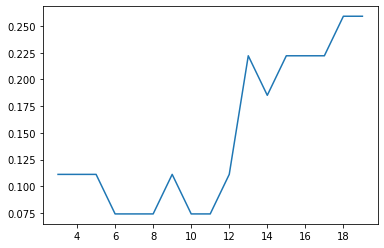

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracies)

The optimal value of k will be the first odd number appearing at a maximum (think about why). What is it? 

In [ ]:
k=5